/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


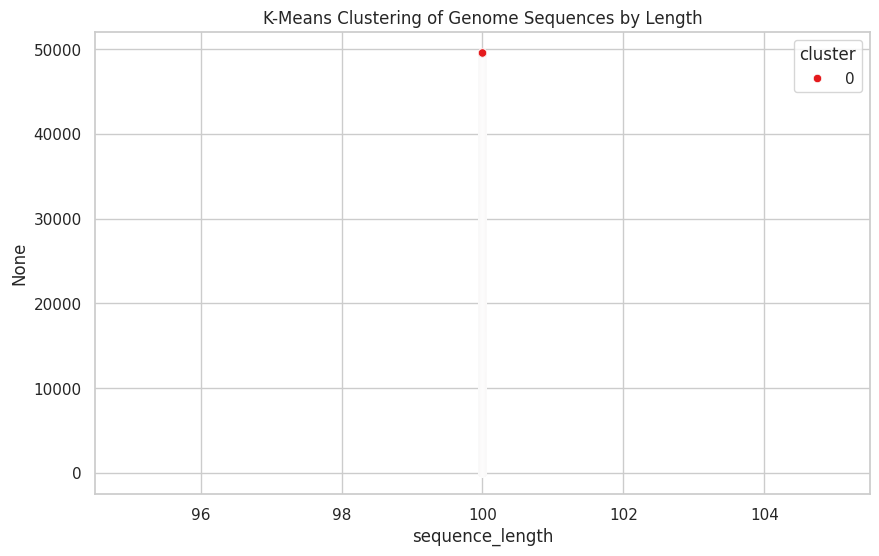

SVM Accuracy: 0.5106425905376778
Confusion Matrix:
 [[   0 4851]
 [   0 5062]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4851
           1       0.51      1.00      0.68      5062

    accuracy                           0.51      9913
   macro avg       0.26      0.50      0.34      9913
weighted avg       0.26      0.51      0.35      9913



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Vocabulary: {'t': 1, 'a': 2, 'c': 3, 'g': 4}
Vocabulary size: 5
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


992/992 ━━━━━━━━━━━━━━━━━━━━ 97s 95ms/step - accuracy: 0.4989 - loss: 0.6934 - val_accuracy: 0.4985 - val_loss: 0.6932
Epoch 2/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5037 - val_loss: 0.6931
Epoch 3/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5015 - val_loss: 0.6931
Epoch 4/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 75s 75ms/step - accuracy: 0.5048 - loss: 0.6931 - val_accuracy: 0.4982 - val_loss: 0.6931
Epoch 5/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5048 - val_loss: 0.6932
Epoch 6/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.4935 - loss: 0.6932 - val_accuracy: 0.5029 - val_loss: 0.6931
Epoch 7/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.5022 - loss: 0.6933 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 8/10
992/992 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accurac

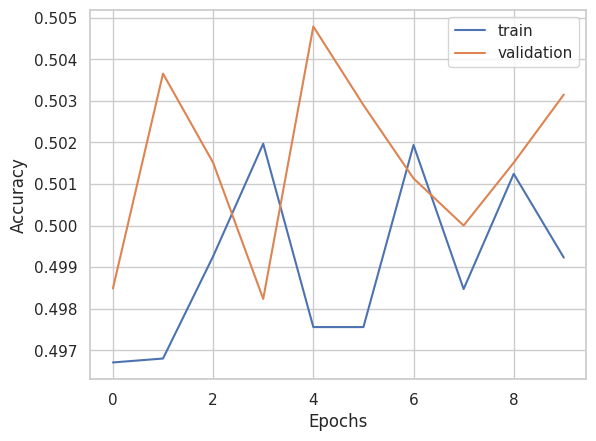

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from Bio import SeqIO

# Load and prepare data
sequences = []
for seq_record in SeqIO.parse('/content/sequence.fasta', 'fasta'):
    sequences.append(str(seq_record.seq))

def split_sequence(sequence, length):
    return [sequence[i:i + length] for i in range(0, len(sequence), length)]

segment_length = 100
segments = []
for seq in sequences:
    segs = split_sequence(seq, segment_length)
    segments.extend(segs)

df = pd.DataFrame(segments, columns=['segment'])
df = df[df['segment'].apply(len) == segment_length]  # Keep only full-length segments
df['sequence_length'] = df['segment'].apply(len)

# 1. Clustering
X = df['sequence_length'].values.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sequence_length'], y=df.index, hue=df['cluster'], palette='Set1')
plt.title('K-Means Clustering of Genome Sequences by Length')
plt.show()

# 2. SVM Classification (using length as feature)
df['label'] = np.random.randint(0, 2, df.shape[0])  # Random labels for demonstration
X = df['sequence_length'].values.reshape(-1, 1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 3. LSTM Model (using actual sequence data)
# Tokenize DNA sequences (A, T, C, G)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['segment'])

# Verify vocabulary
print("Vocabulary:", tokenizer.word_index)

X_seq = tokenizer.texts_to_sequences(df['segment'])
X_padded = pad_sequences(X_seq, maxlen=segment_length)

# Split data for LSTM (use same y as before but ensure alignment)
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_padded, y, test_size=0.2, random_state=42)

# Build LSTM model
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=segment_length),
    LSTM(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1)

# Evaluate
loss, accuracy = lstm_model.evaluate(X_test_seq, y_test_seq)
print(f"LSTM Model Accuracy: {accuracy}")

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()